In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import random
import numpy as np

In [2]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
##Load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


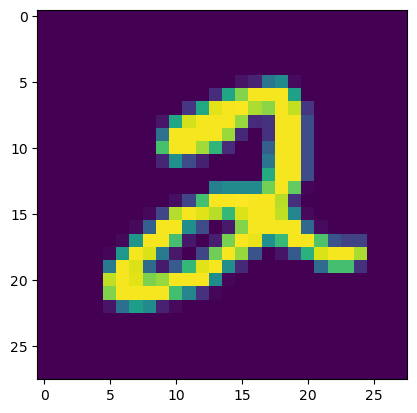

Letter is  2


In [5]:
from matplotlib import pyplot as plt
plt.imshow(x_train[5])
plt.show()
print("Letter is ",y_train[5])

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [8]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [9]:
print(y_train)

[5 0 4 ... 5 6 8]


In [10]:

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(28,28,1)))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))

cnnModel.add(layers.Dense(32, activation="relu"))

cnnModel.add(layers.Dense(10, activation="softmax"))

cnnModel.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        5824      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [13]:
cnnModel.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
history = cnnModel.fit(x_train, y_train, epochs=20, batch_size=32,  validation_data=(x_test,y_test))

Epoch 1/20


1875/1875 [==============================] - 15s 7ms/step - loss: 0.2608 - accuracy: 0.9352 - val_loss: 0.0704 - val_accuracy: 0.9787
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0822 - val_accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0445 - val_accuracy: 0.9857
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0416 - val_accuracy: 0.9880
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0386 - accuracy: 0.9888 - val_loss: 0.0505 - val_accuracy: 0.9852
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0441 - val_accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0401 - val_

In [15]:
testLoss, testAccuracy = cnnModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9898


In [17]:
y_pred = cnnModel.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
print(y_pred)

[[1.34099559e-13 1.38125440e-08 4.03959070e-18 ... 1.00000000e+00
  5.82909744e-17 1.14360604e-10]
 [2.55590588e-25 1.01442767e-22 1.00000000e+00 ... 2.13333124e-19
  3.82425855e-14 2.51887594e-23]
 [7.57381675e-21 1.00000000e+00 4.82106109e-12 ... 2.93192560e-14
  2.87908426e-15 1.05255477e-22]
 ...
 [1.52543654e-28 1.26435311e-18 4.57317410e-28 ... 2.90285751e-25
  6.30997111e-18 1.00807337e-16]
 [3.69191980e-07 1.19713034e-23 1.07858711e-09 ... 1.33493000e-12
  3.56757379e-09 7.09238918e-11]
 [3.09812668e-13 7.96765519e-22 1.19500123e-21 ... 3.41358971e-22
  2.55783390e-20 2.99989627e-26]]


In [19]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
tf.math.confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    1,    0,    0,    1,    1,    1,    1,    0,    0],
       [   0, 1133,    0,    0,    0,    2,    0,    0,    0,    0],
       [   2,    0, 1025,    1,    1,    0,    0,    3,    0,    0],
       [   0,    0,    1, 1003,    0,    3,    0,    2,    1,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    2,    3],
       [   0,    0,    0,    9,    0,  875,    6,    1,    1,    0],
       [   3,    2,    1,    0,    2,    1,  948,    0,    1,    0],
       [   1,    6,    3,    0,    0,    2,    0, 1013,    0,    3],
       [   1,    0,    4,    0,    1,    1,    2,    1,  964,    0],
       [   1,    0,    1,    2,    4,    5,    1,    3,    4,  988]])>

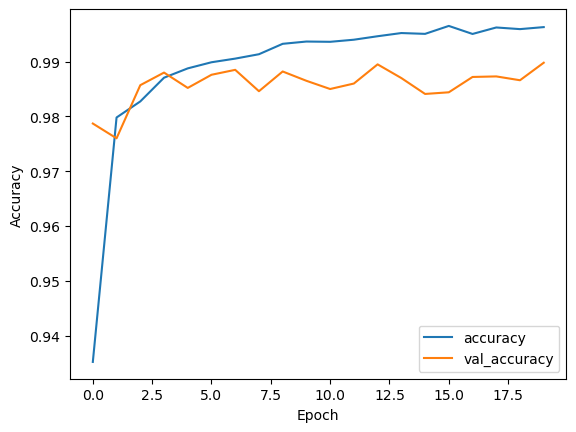

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

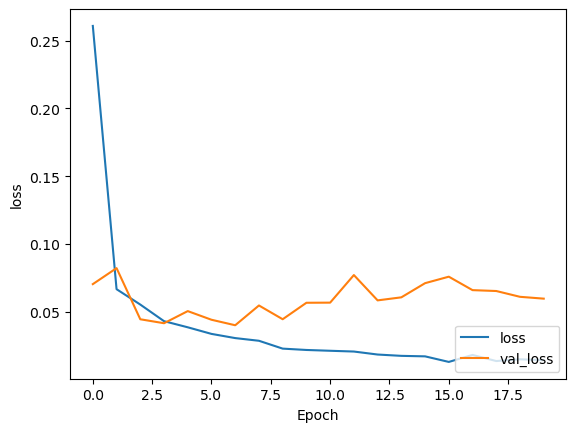

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')